# Données des présidentielles de 1965 à 2012
## Importation et exploration des données

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Project/Datathon%231/Datasets/data_presid_1965-2012.csv',
                index_col=False)
df['Année'] = df['Date'].apply(lambda x: x[:4])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace = True)
df.drop(columns = 'Date', inplace = True)

In [2]:
df.shape

(48372, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48372 entries, 1965-12-05 to 2012-05-06
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code département  48368 non-null  object 
 1   département       48368 non-null  object 
 2   circonscription   48368 non-null  object 
 3   Inscrits          48368 non-null  float64
 4   Votants           48368 non-null  float64
 5   Exprimés          48368 non-null  float64
 6   Blancs et nuls    48368 non-null  float64
 7   Score             48368 non-null  float64
 8   Candidats         48372 non-null  object 
 9   Tour              48372 non-null  float64
 10  Année             48372 non-null  object 
dtypes: float64(6), object(5)
memory usage: 4.4+ MB


In [4]:
df.head()

,Code département,département,circonscription,Inscrits,Votants,Exprimés,Blancs et nuls,Score,Candidats,Tour,Année
Date,,,,,,,,,,,
1965-12-05,1,AIN,1,68818.0,54262.0,53769.0,493.0,11669.0,LECANUET (MRP),1.0,1965
1965-12-05,1,AIN,2,70186.0,57221.0,56780.0,441.0,7936.0,LECANUET (MRP),1.0,1965
1965-12-05,1,AIN,3,67492.0,55503.0,55006.0,497.0,10811.0,LECANUET (MRP),1.0,1965
1965-12-05,2,AISNE,1,52618.0,46064.0,45564.0,500.0,7242.0,LECANUET (MRP),1.0,1965
1965-12-05,2,AISNE,2,68770.0,59908.0,59145.0,763.0,8066.0,LECANUET (MRP),1.0,1965


In [5]:
df.tail()

,Code département,département,circonscription,Inscrits,Votants,Exprimés,Blancs et nuls,Score,Candidats,Tour,Année
Date,,,,,,,,,,,
2012-05-06,95,VAL-D'OISE,1,116492.0,101867.0,98727.0,3140.0,45178.0,GISCARD D'ESTAING (UDF),2.0,2012
2012-05-06,95,VAL-D'OISE,2,88572.0,76804.0,74415.0,2389.0,34047.0,GISCARD D'ESTAING (UDF),2.0,2012
2012-05-06,95,VAL-D'OISE,3,68462.0,57233.0,55549.0,1684.0,18739.0,GISCARD D'ESTAING (UDF),2.0,2012
2012-05-06,95,VAL-D'OISE,4,107816.0,93268.0,90150.0,3118.0,45051.0,GISCARD D'ESTAING (UDF),2.0,2012
2012-05-06,95,VAL-D'OISE,5,152501.0,129716.0,125358.0,4358.0,48709.0,GISCARD D'ESTAING (UDF),2.0,2012


## Calcul du taux de votants et d'abstention

In [6]:
df['Votants (%)'] = round(df['Votants'] / df['Inscrits'] * 100, 2)
df['Abstention (%)'] = 100 - df['Votants (%)']

In [7]:
# df.to_csv('data_presid_1965-2012_taux.csv')

In [8]:
df.head()

,Code département,département,circonscription,Inscrits,Votants,Exprimés,Blancs et nuls,Score,Candidats,Tour,Année,Votants (%),Abstention (%)
Date,,,,,,,,,,,,,
1965-12-05,1,AIN,1,68818.0,54262.0,53769.0,493.0,11669.0,LECANUET (MRP),1.0,1965,78.85,21.15
1965-12-05,1,AIN,2,70186.0,57221.0,56780.0,441.0,7936.0,LECANUET (MRP),1.0,1965,81.53,18.47
1965-12-05,1,AIN,3,67492.0,55503.0,55006.0,497.0,10811.0,LECANUET (MRP),1.0,1965,82.24,17.76
1965-12-05,2,AISNE,1,52618.0,46064.0,45564.0,500.0,7242.0,LECANUET (MRP),1.0,1965,87.54,12.46
1965-12-05,2,AISNE,2,68770.0,59908.0,59145.0,763.0,8066.0,LECANUET (MRP),1.0,1965,87.11,12.89


### Visualisation des taux
#### Globalité

In [11]:
import matplotlib.pyplot as plt

In [12]:
df_tx_glob = df.groupby(by = ['Année', 'Tour']).mean().reset_index()

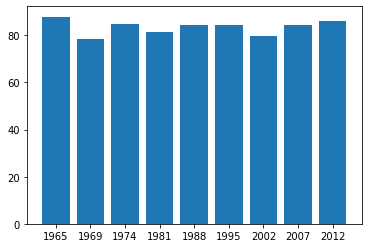

In [13]:
_ = plt.bar('Année', 'Votants (%)', data = df_tx_glob)

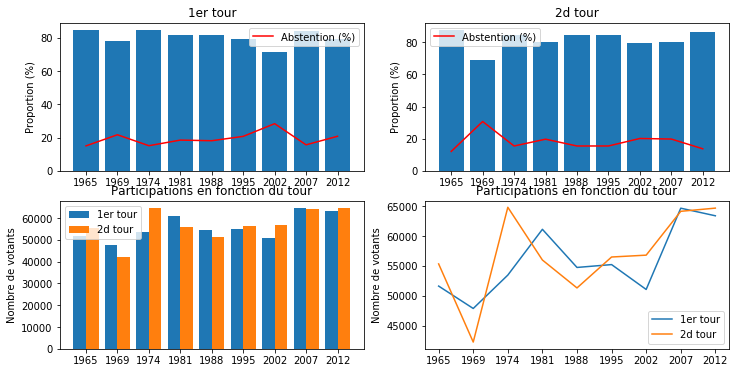

In [14]:
fig = plt.subplots(figsize = (12, 6))
ax1 = plt.subplot(221)
ax1.bar('Année', 'Votants (%)', data = df_tx_glob[df_tx_glob['Tour'] == 1])
ax1.plot('Année', 'Abstention (%)', data = df_tx_glob[df_tx_glob['Tour'] == 1], color = 'r')
ax1.set_title('1er tour')
ax1.set_ylabel('Proportion (%)')
ax1.legend()

ax2 = plt.subplot(222)
ax2.bar('Année', 'Votants (%)', data = df_tx_glob[df_tx_glob['Tour'] == 2])
ax2.plot('Année', 'Abstention (%)', data = df_tx_glob[df_tx_glob['Tour'] == 2], color = 'r')
ax2.set_title('2d tour')
ax2.set_ylabel('Proportion (%)')
ax2.legend()

ax3 = plt.subplot(223)
ax3.bar('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 1], width = -.4, align='edge', label = '1er tour')
ax3.bar('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 2], width = .4, align='edge', label = '2d tour')
ax3.set_title('Participations en fonction du tour')
ax3.set_ylabel('Nombre de votants')
ax3.legend()

ax4 = plt.subplot(224)
ax4.plot('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 1], label = '1er tour')
ax4.plot('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 2], label = '2d tour')
ax4.set_title('Participations en fonction du tour')
ax4.set_ylabel('Nombre de votants')
ax4.legend()

plt.show()

#### Par départements

## Orientations politiques

Création d'une dichotomie pour les partis politiques : **Gauche** vs. **Droite**. 

In [47]:
candidats = df['Candidats'].unique()
[print(i) for i in candidats]

LECANUET (MRP)
DE GAULLE (UNR)
MARCILHACY (DVD)
TIXIER-VIGNANCOUR (EXD)
BARBU (DIV)
ROCARD (PSU)
DUCLOS (PCF)
DEFFERRE (SFIO)
POMPIDOU (UDR)
POHER (CD)
DUCATEL (DIV)
KRIVINE (LCR)
MITTERRAND (PS)
MULLER (MDSR)
DUMONT (ECO)
GISCARD D'ESTAING (RI)
CHABAN-DELMAS (UDR)
RENOUVIN (NAR)
ROYER (DVD)
LE PEN (FN)
HERAUD (DIV)
SEBAG (DIV)
BOUCHARDEAU (PSU)
MARCHAIS (PCF)
CREPEAU (MRG)
LALONDE (ECO)
GISCARD D'ESTAING (UDF)
CHIRAC (RPR)
DEBRE (DVD)
GARAUD (DVD)
LAGUILLER (LO)
LAJOINIE (PCF)
JUQUIN ( )
WAECHTER (V)
BARRE (UDF)
HUE (PCF)
JOSPIN (PS)
VOYNET (VERTS)
BALLADUR (UDF)
DE VILLIERS (MPF)
CHEMINADE (POE)
BESANCENOT (LCR)
TAUBIRA (PRG)
CHEVENEMENT (P. REP)
MAMERE (VERTS)
LEPAGE (CAP 21)
BAYROU (UDF)
MADELIN (DL)
CHIRAC (UMP)
BOUTIN (UDF DISS.)
MEGRET (MNR)
SAINT-JOSSE (CNPT)
BOVE
BUFFET (PC)
ROYAL (PS)
SARKOZY (UMP)
DE VILLIERS MPF)
NIHOUS (CNPT)
Philippe POUTOU (NPA)
Jean-Luc MELENCHON (FG)
François HOLLANDE (PS)
Eva JOLY (EELV)
François BAYROU (MODEM)
Nicolas SARKOZY (UMP)
Nicolas DUPONT-AIG

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]